# Replication assignment

Replicate the results found in Bryant et al  (2010), Rozenberg et al (2014), and Hamarat et al (2013). The data files are named accordingly. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for this week. You can also look at Kwakkel & Jaxa-Rozen (2016), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 




In [91]:
import pandas as pd

In [11]:
data = pd.DataFrame.from_csv("data/Bryant et al 2010.csv")

In [13]:
data = data.reset_index()

In [17]:
x = data.ix[:,2:11]
y = data.ix[:,15]

In [21]:
x = x.to_records()
y = y.values

In [22]:
from ema_workbench.analysis import prim

In [24]:
from ema_workbench import ema_logging

In [25]:
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

we set the peeling alpha to 0.1. The peeling alpha determines how much data is peeled off in each iteration of the algorithm. The lower the value, the less data is removed in each iteration. The minimium coverage threshold that a box should meet is set to 0.8.

In [26]:
prim_alg = prim.Prim(x,y, threshold=0.8, peel_alpha=0.1)

In [27]:
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6.0


In [28]:
import matplotlib.pyplot as plt

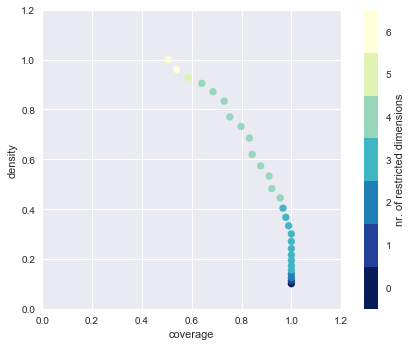

In [29]:
box1.show_tradeoff()
plt.show()

coverage    0.752809
density     0.770115
mass        0.098639
mean        0.770115
res dim     4.000000
Name: 21, dtype: float64

                            box 21                          
                               min         max     qp values
Demand elasticity        -0.422000   -0.202000  1.184930e-16
Biomass backstop price  150.049995  199.600006  3.515113e-11
Total biomass           450.000000  755.799988  4.716969e-06
Cellulosic cost          72.650002  133.699997  1.574133e-01



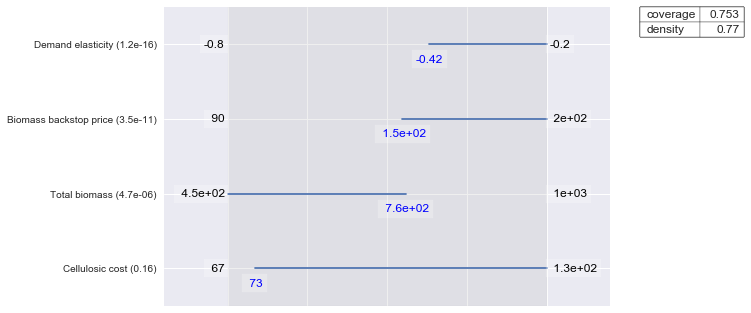

In [49]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

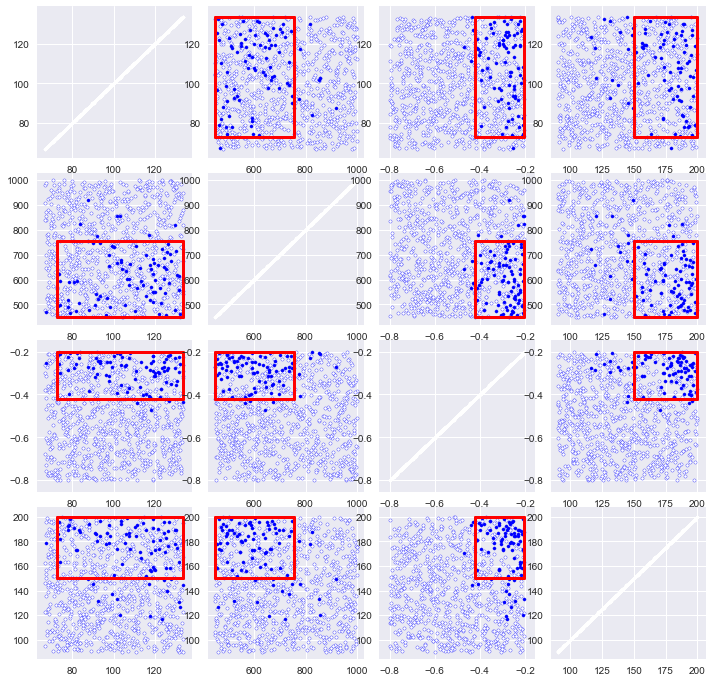

In [54]:
box1.select(21)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

In [62]:
box2 = prim_alg.find_box()

[MainProcess/INFO] no data remaining


In [80]:
print(prim_alg.stats_to_dataframe(),'\n')
print(prim_alg.boxes_to_dataframe())

       coverage   density      mass  res_dim
box 1  0.752809  0.770115  0.098639      4.0
box 2  0.247191  0.027673  0.901361      0.0 

                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997


# Case 2: Rozenberg et al. 

In [92]:
import pandas as pd

In [93]:
pd.read_csv("data/Rozenberg et al 2014.csv")

inequalities  convergence  population  behaviors  technologies  fossils  \
0               0            2           0          0             0        0   
1               0            2           0          0             0        0   
2               0            2           0          0             0        1   
3               0            2           0          0             0        1   
4               0            2           0          0             1        0   
5               0            2           0          0             1        0   
6               0            2           0          0             1        1   
7               0            2           0          0             1        1   
8               0            2           0          1             0        0   
9               0            2           0          1             0        0   
10              0            2           0          1             0        1   
11              0            2           0          1             0        1   
12              0            2           0          1             1        0   
13              0            2           0          1             1        0   
14              0            2           0          1             1        1   
15              0            2           0          1             1        1   
16              0            2           1          0             0        0   
17              0            2           1          0             0        0   
18              0            2           1          0             0        1   
19              0            2           1          0             0        1   
20              0            2           1          0             1        0   
21              0            2           1          0             1        0   
22              0            2           1          0             1        1   
23              0            2           1          0             1        1   
24              0            2           1          1             0        0   
25              0            2           1          1             0        0   
26              0            2           1          1             0        1   
27              0            2           1          1             0        1   
28              0            2           1          1             1        0   
29              0            2           1          1             1        0   
..            ...          ...         ...        ...           ...      ...   
256             1            1           1          0             0        0   
257             1            1           1          0             0        1   
258             1            1           1          0             0        1   
259             1            1           1          0             1        0   
260             1            1           1          0             1        0   
261             1            1           1          0             1        1   
262             1            1           1          0             1        1   
263             1            1           1          1             0        0   
264             1            1           1          1             0        0   
265             1            1           1          1             0        1   
266             1            1           1          1             1        0   
267             1            1           1          1             1        0   
268             1            1           1          1             1        1   
269             1            1           1          1             1        1   
270             1            1           2          0             0        0   
271             1            1           2          0             0        0   
272             1            1           2          0             0        1   
273             1            1           2          0             0        1   
274  